In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
from waterlevels_oker.data import preprocess_ohrum_data, preprocess_weather_data

%config InlineBackend.figure_format = "retina"

In [19]:
ohrum_data = preprocess_ohrum_data()
weather_data = preprocess_weather_data()

In [20]:
ohrum_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 171575 entries, 2005-01-01 01:00:00 to 2024-07-28 23:00:00
Data columns (total 1 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   waterlevel relative [cm]  171575 non-null  float64
dtypes: float64(1)
memory usage: 6.6 MB


In [21]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123046 entries, 2010-01-01 01:00:00 to 2024-07-31 00:00:00
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   precipitation        123046 non-null  float64
 1   pressure_msl         123046 non-null  float64
 2   sunshine             123046 non-null  float64
 3   temperature          123046 non-null  float64
 4   wind_direction       123046 non-null  float64
 5   wind_speed           123046 non-null  float64
 6   cloud_cover          123046 non-null  float64
 7   dew_point            123046 non-null  float64
 8   relative_humidity    123046 non-null  float64
 9   visibility           123046 non-null  float64
 10  wind_gust_direction  123046 non-null  float64
 11  wind_gust_speed      123046 non-null  float64
 12  solar                123046 non-null  float64
dtypes: float64(13)
memory usage: 13.1 MB


In [22]:
data_full = weather_data.join(ohrum_data, how="inner")

In [23]:
data_full

,precipitation,pressure_msl,sunshine,temperature,wind_direction,wind_speed,cloud_cover,dew_point,relative_humidity,visibility,wind_gust_direction,wind_gust_speed,solar,waterlevel relative [cm]
2010-01-01 01:00:00,0.0,996.6,0.0,-1.8,70.0,16.9,100.0,-3.5,88.0,12000.0,50.0,28.8,0.000,161.0
2010-01-01 02:00:00,0.0,996.7,0.0,-1.8,60.0,16.6,100.0,-3.4,89.0,16000.0,70.0,27.4,0.000,161.0
2010-01-01 03:00:00,0.0,996.5,0.0,-1.8,60.0,16.9,100.0,-3.5,88.0,15000.0,60.0,26.6,0.000,161.0
2010-01-01 04:00:00,0.2,996.5,0.0,-2.1,50.0,15.5,100.0,-3.4,91.0,7000.0,50.0,24.5,0.000,161.0
2010-01-01 05:00:00,0.1,996.6,0.0,-2.3,40.0,12.6,100.0,-3.7,90.0,7000.0,50.0,19.8,0.000,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-28 19:00:00,0.0,1024.8,55.0,18.9,320.0,8.3,12.0,12.3,66.0,74660.0,330.0,16.9,0.069,168.0
2024-07-28 20:00:00,0.0,1025.3,0.0,16.0,300.0,5.0,0.0,13.3,84.0,21510.0,310.0,7.2,0.005,166.0
2024-07-28 21:00:00,0.0,1025.5,0.0,16.4,320.0,6.8,0.0,11.9,75.0,65270.0,310.0,11.9,0.000,164.0
2024-07-28 22:00:00,0.0,1025.8,0.0,15.0,330.0,8.3,0.0,11.1,77.0,75000.0,330.0,12.6,0.000,161.0


<Axes: >

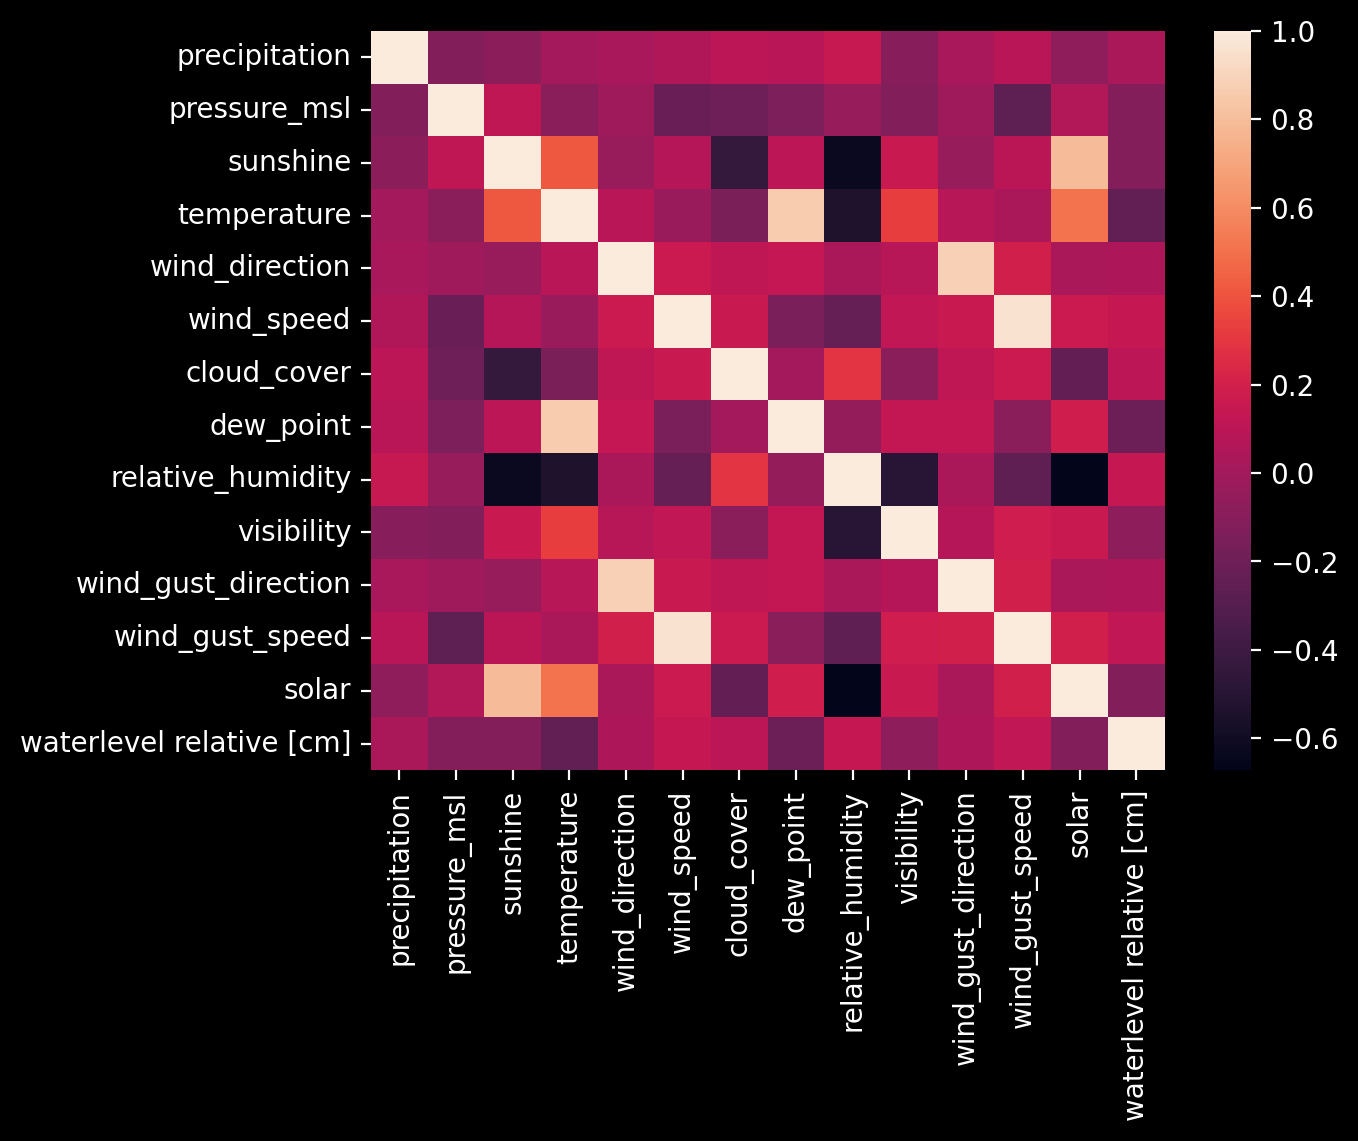

In [24]:
sns.heatmap(data_full.corr())

In [40]:
corr_df = data_full.corr()[["waterlevel relative [cm]"]]
corr_df = corr_df.iloc[:-1]
corr_df = corr_df.rename(columns={"waterlevel relative [cm]": "correlation"})
corr_df.loc[:, "absolute_correlation"] = abs(corr_df["correlation"])
corr_df.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
temperature,-0.250675,0.250675
dew_point,-0.210607,0.210607
relative_humidity,0.142802,0.142802
wind_speed,0.139302,0.139302
wind_gust_speed,0.124006,0.124006
solar,-0.117655,0.117655
sunshine,-0.115332,0.115332
pressure_msl,-0.113406,0.113406
cloud_cover,0.103585,0.103585
visibility,-0.072098,0.072098


In [45]:
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

X = data_full.drop(columns="waterlevel relative [cm]")
y = data_full["waterlevel relative [cm]"]

X_scaled = MinMaxScaler().fit_transform(X)

# Fit model
lin_model = LinearRegression().fit(X_scaled, y)

# Performs Permutation
permutation_score = permutation_importance(lin_model, X_scaled, y, n_repeats=20)

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(
	np.vstack((X.columns, permutation_score.importances_mean)).T
)
importance_df.columns = ["feature", "score decrease"]

# Show the important features
importance_df.sort_values(by="score decrease", ascending=False)

,feature,score decrease
5,wind_speed,0.02993
7,dew_point,0.027394
3,temperature,0.026368
1,pressure_msl,0.024557
8,relative_humidity,0.022539
10,wind_gust_direction,0.001326
4,wind_direction,0.001133
6,cloud_cover,0.001108
11,wind_gust_speed,0.001017
12,solar,0.000636
